In [45]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors

def asignar_color(NGRUPOS):
    color_codes = ["#%02x%02x%02x"%(int(r), int(g), int(b)) \
            for r, g, b, _ in 255*cm.jet(colors.Normalize()(range(NGRUPOS)))
    ]
    return color_codes

In [ ]:
digits = load_digits()
images = digits.data

In [14]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [68]:
Y = digits.target
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

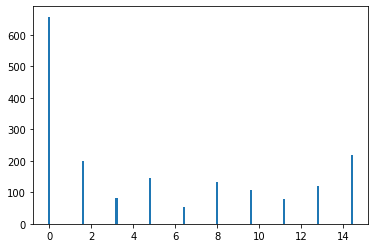

In [29]:
freq, rango = np.histogram(images[:,5], bins=10)
plt.bar(rango[:-1], freq, 0.1)
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split( \
    images, Y, test_size=0.33, random_state=42)

In [36]:
lda = LinearDiscriminantAnalysis()

In [38]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
ypred = lda.predict(X_test)

In [48]:
print(confusion_matrix(y_test, ypred))
print(accuracy_score(y_test, ypred))
# print(f1_score(y_test, ypred,))

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 49  2  0  0  0  0  0  2  2]
 [ 0  0 50  2  0  0  0  0  0  0]
 [ 0  0  1 53  0  1  0  0  1  0]
 [ 0  1  0  0 62  0  0  1  0  0]
 [ 0  0  0  0  0 69  1  0  0  3]
 [ 0  0  0  0  0  0 56  0  0  1]
 [ 0  0  0  0  0  1  0 60  0  1]
 [ 0  4  0  0  0  1  0  0 47  0]
 [ 0  0  0  1  0  0  0  1  3 63]]
0.9494949494949495


In [51]:
res = cross_val_score(lda, images, Y, cv=5)
np.mean(res)

0.9081832250077376

In [53]:
xlda = lda.transform(X_test)

In [70]:
dictcolors

{0: '#00007f',
 1: '#0000ff',
 2: '#0080ff',
 3: '#15ffe1',
 4: '#7cff79',
 5: '#e4ff12',
 6: '#ff9400',
 7: '#ff1d00',
 8: '#7f0000'}

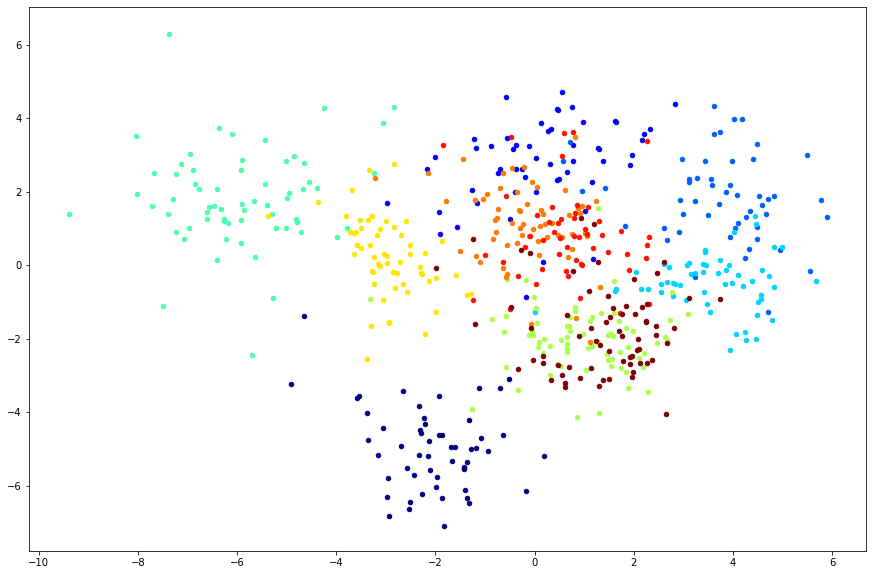

In [75]:
colores = asignar_color(xlda.shape[1] + 1)
tunicos = np.unique(Y)
dictcolors = dict(zip(tunicos, colores))

fig = plt.figure(figsize=(15, 10))
for targ in tunicos:
    filtro = y_test == targ
    plt.scatter(xlda[filtro, 0], xlda[filtro, 1], color=dictcolors[targ], s=20, marker='o')
plt.show()